In [ ]:
import json

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import altair as alt
from PIL import Image

In [587]:
df = pd.read_csv('station_genus_count_label.csv', index_col='station')

df1 = df.loc['dn_20210111']
df1.to_csv('csvs/dn_20210111_gcl.csv')

df2 = df.loc['dn_20210114']
df2.to_csv('csvs/dn_20210114_gcl.csv')

df3 = df.loc['dn_20210122']
df3.to_csv('csvs/dn_20210122_gcl.csv')

df4 = df.loc['hsn_20201227']
df4.to_csv('csvs/hsn_20201227_gcl.csv')

df5 = df.loc['hsn_20210120_4k']
df5.to_csv('csvs/hsn_20210120_4k_gcl.csv')


station1 = df1.copy()
cyanocount = int(station1[station1['genus'] == "Cyanobacteria"]['count'])
neocount = int(station1[station1['genus'] == "Neoceratium pentagonum"]['count'])
steecount = int(station1[station1['genus'] == "Steenstrupiella"]['count'])
acancount = int(station1[station1['genus'] == "Acantharia"]['count'])
planktonsumcounts = sum(station1[station1['label'] == 1]['count'])
detrituscounts = int(station1[station1['genus'] == 'detritus']['count'])
sumcounts = sum(station1['count'].to_list())
print((sumcounts - (detrituscounts + planktonsumcounts)) / sumcounts)
station1['count'] = np.log(station1['count'])


station2 = df2.copy()
station2['count'] = np.log(station2['count'])


station3 = df3.copy()
station3['count'] = np.log(station3['count'])

station4 = df4.copy()
station4['count'] = np.log(station4['count'])

station5 = df5.copy()
diatomacount5 = int(station5[station5['genus'] == "Diatoma"]['count'])
cyanocount5 = int(station5[station5['genus'] == "Cyanobacteria"]['count'])
hemicount5 = int(station5[station5['genus'] == "Hemiaulus"]['count'])
chaetocount5 = int(station5[station5['genus'] == "Chaetoceros"]['count'])
sumcounts5 = sum(station5['count'].to_list())
station5['count'] = np.log(station5['count'])



station1 = station1.sort_values(['label', 'count'], ascending=[False, False])
size1 = station1.label.value_counts()
size5 = station5.label.value_counts()
station5 = station5.sort_values(['label', 'count'], ascending=[False, False])

0.2549711353431687


In [590]:
df_present = pd.read_csv('newtopkid.csv')
df_present.head(10)

,image,Podolampas,detritus,Chaetoceros,cyst,Hemiaulus,lightrods,rods,Cyanobacteria,part<Crustacea,...,diatom scale,cup like,Dictyocysta,Nassellaria,Ditylum,Neocalyptrella,Ceratocorys,puff,Planktoniella sol,Spumellaria
0,86177.jpg,0.001130,0.732944,0.001744,0.001391,0.000340,0.001205,0.002022,0.001539,0.006238,...,0.004237,0.001755,0.000793,0.001040,0.001538,0.000976,0.000829,0.000907,0.001339,0.001362
1,86178.jpg,0.001083,0.001626,0.005331,0.001771,0.002813,0.000600,0.000738,0.001024,0.039054,...,0.001489,0.001028,0.000538,0.000339,0.002103,0.000804,0.001722,0.002655,0.001386,0.000982
2,86179.jpg,0.001002,0.134735,0.740535,0.000531,0.000766,0.000629,0.000508,0.001598,0.001262,...,0.000689,0.000950,0.000514,0.000425,0.000530,0.000700,0.000647,0.000645,0.000759,0.000502
3,86180.jpg,0.000907,0.531249,0.019533,0.001481,0.002658,0.001513,0.001148,0.001866,0.057844,...,0.002957,0.001875,0.000681,0.001268,0.001391,0.001391,0.000732,0.001191,0.000914,0.001050
4,86181.jpg,0.002622,0.165936,0.000697,0.002710,0.000830,0.001696,0.001785,0.001074,0.001634,...,0.001414,0.001280,0.001207,0.001147,0.001768,0.001551,0.001458,0.001590,0.000775,0.001200
5,86182.jpg,0.001112,0.355837,0.005693,0.001728,0.000410,0.007766,0.094667,0.093017,0.007567,...,0.006189,0.005522,0.000962,0.001105,0.002618,0.001843,0.002076,0.002745,0.000900,0.001044
6,86183.jpg,0.000586,0.310847,0.006720,0.002428,0.000701,0.001125,0.002125,0.013953,0.172878,...,0.002031,0.001995,0.000623,0.004051,0.002496,0.002088,0.001093,0.011443,0.000605,0.001344
7,86184.jpg,0.000574,0.006865,0.000539,0.001184,0.000411,0.002370,0.008270,0.884941,0.002314,...,0.000975,0.001067,0.001127,0.001209,0.001094,0.000900,0.000655,0.002290,0.000832,0.000911
8,86185.jpg,0.000848,0.290121,0.005181,0.002052,0.000566,0.001104,0.005565,0.326994,0.016804,...,0.001312,0.001477,0.000753,0.002398,0.001284,0.001731,0.000895,0.018239,0.000912,0.001703
9,86186.jpg,0.001390,0.055205,0.003546,0.001162,0.254059,0.006067,0.002890,0.006285,0.025650,...,0.000893,0.001490,0.001220,0.001191,0.005374,0.002220,0.001454,0.002024,0.001257,0.001020


<ipython-input-585-d09003f182d4>:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('Station_1.jpg', bbox_inches='tight')


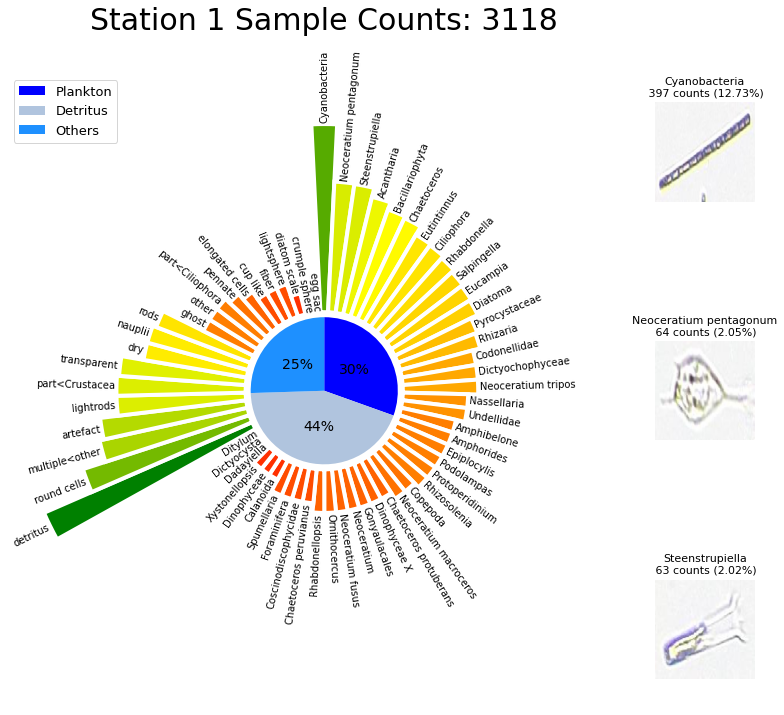

<Figure size 432x288 with 0 Axes>

In [585]:
offset = 250
padding = 4
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
gspolar = GridSpec(nrows=1, ncols=2)
gs = GridSpec(nrows=7, ncols=5)
# hfont = {'fontname':'Tex Gyre Heros'}

# fig, ax = plt.subplots(1, figsize=(20, 20), subplot_kw=dict(polar=True, zorder=1))
fig = plt.figure(figsize=(25, 15), constrained_layout=True)
ax = fig.add_subplot(gspolar[:, 0], polar=True)
ax.axis('off')
ax.set_title(f'Station 1 Sample Counts: {sumcounts}', va='bottom', fontsize=30, y=1.05, x=0.5)

sizes = [planktonsumcounts/sumcounts, detrituscounts/sumcounts, (sumcounts - (detrituscounts + planktonsumcounts)) / sumcounts]
labels = ['Plankton', 'Detritus', 'Others']

# heights = df.count + offset
width = 2 * np.pi / len(station1.index) 
angles = np.arange(0, 2 * np.pi, width)
bars = ax.bar(x=angles, height=station1['count'] * 100, width=width, bottom=offset, linewidth=4, edgecolor='white', color=cmap(station1['count'] / station1['count'].max()))

for bar, angle, label in zip(bars, angles, station1['genus']):
    rotation = -np.rad2deg(angle)

    # if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
    #     alignment = "right"
    #     rotation += 180
    # else:
    #     alignment = "left"
    if angle >= 0 and angle < np.pi:
        alignment = "left"
        rotation += 90
    else:
        alignment = "right"
        rotation += 270

    ax.text(x=angle, y=offset + bar.get_height() + padding, s=label, ha=alignment, va='center', rotation=rotation, rotation_mode='anchor')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
# autopct='%1.2f%%'

# axp = fig.add_subplot(111, label='pie axes', zorder=0)
axp = fig.add_subplot(gspolar[:, 0], label='pie axes', zorder=0)
axp.pie(sizes, radius=0.29, autopct='%1.0f%%', startangle=90, labeldistance=0, counterclock=False, pctdistance=0.5, colors=['blue', 'lightsteelblue', 'dodgerblue'], textprops={'fontsize': 14})
axp.legend(labels, fontsize=13, loc='upper left')
axp.set(aspect="equal")
# plt.savefig(f'../../figure_{num}.jpg', bbox_inches='tight')

im = Image.open('Cyanobacteria.jpg').resize((224, 224), resample=Image.NEAREST)
im2 = Image.open('Neoceratium_pentagonum.jpg').resize((224, 224), resample=Image.NEAREST)
im3 = Image.open('Steenstrupiella.jpg').resize((224, 224), resample=Image.NEAREST)
im4 = Image.open('Acantharia.jpg').resize((224, 224), resample=Image.NEAREST)
# aximg = fig.add_subplot(122, label='image')
# aximg.imshow(img)



# newax = fig.add_axes([1, 0.6, 0.2, 0.2], anchor='NE', zorder=-1)
# newax = fig.add_subplot(171, anchor='NE', zorder=-1)
newax = fig.add_subplot(gs[1:2, 2])
newax.imshow(im)
newax.set_title(f"Cyanobacteria\n {cyanocount} counts ({round(cyanocount/sumcounts * 100, 2)}%)", fontsize=11)
newax.axis('off')

# newax2 = fig.add_axes([1.4, 0.6, 0.2, 0.2], anchor='NE', zorder=-1)
# newax2 = fig.add_subplot(1, 7, (2, 2), anchor='NE', zorder=-1)
newax2 = fig.add_subplot(gs[3:4, 2])
newax2.imshow(im2)
newax2.set_title(f"Neoceratium pentagonum\n {neocount} counts ({round(neocount/sumcounts * 100, 2)}%)", fontsize=11)
newax2.axis('off')

# newax3 = fig.add_axes([1, 0.2, 0.2, 0.2], anchor='NE', zorder=-1)
# newax3 = fig.add_subplot(3, 7, 1, anchor='S', zorder=-1)
newax3 = fig.add_subplot(gs[5:6, 2])
newax3.imshow(im3)
newax3.set_title(f"Steenstrupiella\n {steecount} counts ({round(steecount/sumcounts * 100, 2)}%)", fontsize=11)
newax3.axis('off')

# newax4 = fig.add_axes([1.4, 0.2, 0.2, 0.2], anchor='NE', zorder=-1)
# newax4 = fig.add_subplot(3, 7, 2, anchor='S', zorder=-1)
# newax4 = fig.add_subplot(gs[7, 2])
# newax4.imshow(im4)
# newax4.set_title(f"Acantharia\n {acancount} counts ({round(acancount/sumcounts * 100, 2)}%)", fontsize=10)
# newax4.axis('off')
plt.savefig('Station_1.jpg', bbox_inches='tight')
plt.show()
# plt.savefig('Station_1.jpg')
plt.clf()

In [ ]:
plt.figure(figsize=(18, 14))
plt.tight_layout()
ax = plt.subplot(polar=True)
ax.set_title(f'Station 2', va='bottom', fontsize=20, y=1.0, pad=-395)

plt.axis('off')

# heights = df.count + offset
width = 2 * np.pi / len(station2.index) 
angles = np.arange(0, 2 * np.pi, width)
bars = ax.bar(x=angles, height=station2['count'] * 100, width=width, bottom=offset, linewidth=4, edgecolor='white', color=cmap(station2['count'] / station2['count'].max()))

for bar, angle, label in zip(bars, angles, station2['genus']):
    rotation = np.rad2deg(angle)

    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation += 180
    else:
        alignment = "left"

    ax.text(x=angle, y=offset + bar.get_height() + padding, s=label, ha=alignment, va='center', rotation=rotation, rotation_mode='anchor')

# ax.set_theta_zero_location('N')

# plt.savefig(f'../../figure_{num}.jpg', bbox_inches='tight')
plt.savefig('Station_2.jpg')
plt.show()
plt.clf()

In [ ]:
plt.figure(figsize=(18, 14))
plt.tight_layout()
ax = plt.subplot(polar=True)
ax.set_title(f'Station 3', va='bottom', fontsize=20, y=1.0, pad=-395)

plt.axis('off')

# heights = df.count + offset
width = 2 * np.pi / len(station3.index) 
angles = np.arange(0, 2 * np.pi, width)
bars = ax.bar(x=angles, height=station3['count'] * 100, width=width, bottom=offset, linewidth=4, edgecolor='white', color=cmap(station3['count'] / station3['count'].max()))

for bar, angle, label in zip(bars, angles, station3['genus']):
    rotation = np.rad2deg(angle)

    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation += 180
    else:
        alignment = "left"

    ax.text(x=angle, y=offset + bar.get_height() + padding, s=label, ha=alignment, va='center', rotation=rotation, rotation_mode='anchor')

# ax.set_theta_zero_location('N')

# plt.savefig(f'../../figure_{num}.jpg', bbox_inches='tight')
plt.savefig('Station_3.jpg')
plt.show()
plt.clf()

In [ ]:
plt.figure(figsize=(18, 14))
plt.tight_layout()
ax = plt.subplot(polar=True)
ax.set_title(f'Station 4', va='bottom', fontsize=20, y=1.0, pad=-395)

plt.axis('off')

# heights = df.count + offset
width = 2 * np.pi / len(station4.index) 
angles = np.arange(0, 2 * np.pi, width)
bars = ax.bar(x=angles, height=station4['count'] * 100, width=width, bottom=offset, linewidth=4, edgecolor='white', color=cmap(station4['count'] / station4['count'].max()))

for bar, angle, label in zip(bars, angles, station4['genus']):
    rotation = np.rad2deg(angle)

    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation += 180
    else:
        alignment = "left"

    ax.text(x=angle, y=offset + bar.get_height() + padding, s=label, ha=alignment, va='center', rotation=rotation, rotation_mode='anchor')

# ax.set_theta_zero_location('N')

# plt.savefig(f'../../figure_{num}.jpg', bbox_inches='tight')
plt.savefig('Station_4.jpg')
plt.show()
plt.clf()

<ipython-input-569-c34ea5764d2d>:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('Station_5.jpg', bbox_inches='tight')


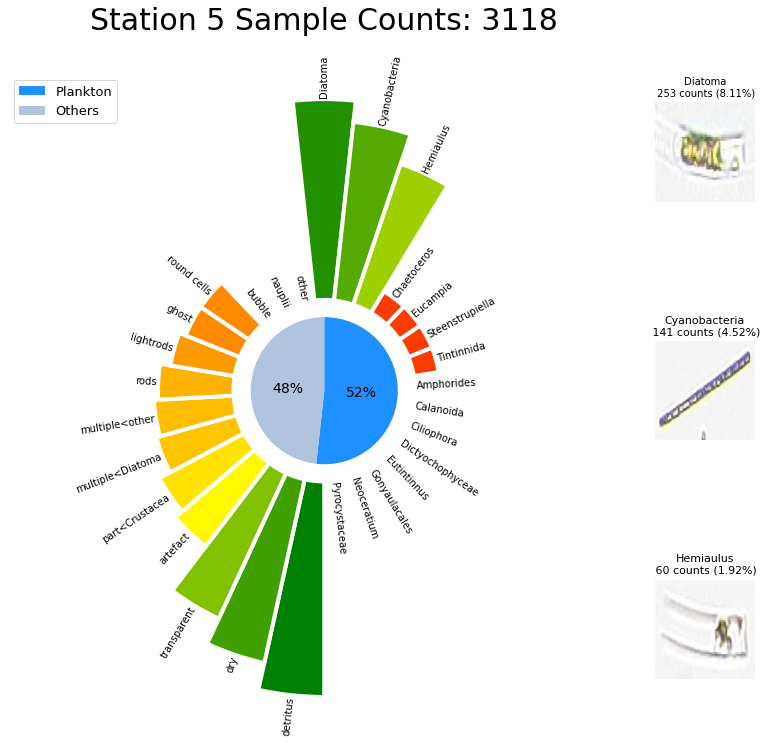

<Figure size 432x288 with 0 Axes>

In [569]:
offset = 250
padding = 4
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
gspolar = GridSpec(nrows=1, ncols=2)
gs = GridSpec(nrows=7, ncols=5)
# hfont = {'fontname':'Tex Gyre Heros'}

# fig, ax = plt.subplots(1, figsize=(20, 20), subplot_kw=dict(polar=True, zorder=1))
fig = plt.figure(figsize=(25, 15), constrained_layout=True)
ax = fig.add_subplot(gspolar[:, 0], polar=True)
ax.axis('off')
ax.set_title(f'Station 5 Sample Counts: {sumcounts}', va='bottom', fontsize=30, y=1.05, x=0.5)

sizes = [size5[1] / sum(size5), size5[0] / sum(size5)]
labels = ['Plankton', 'Others']

# heights = df.count + offset
width = 2 * np.pi / len(station5.index) 
angles = np.arange(0, 2 * np.pi, width)
bars = ax.bar(x=angles, height=station5['count'] * 100, width=width, bottom=offset, linewidth=4, edgecolor='white', color=cmap(station5['count'] / station5['count'].max()))

for bar, angle, label in zip(bars, angles, station5['genus']):
    rotation = -np.rad2deg(angle)

    # if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
    #     alignment = "right"
    #     rotation += 180
    # else:
    #     alignment = "left"
    if angle >= 0 and angle < np.pi:
        alignment = "left"
        rotation += 90
    else:
        alignment = "right"
        rotation += 270

    ax.text(x=angle, y=offset + bar.get_height() + padding, s=label, ha=alignment, va='center', rotation=rotation, rotation_mode='anchor')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
# autopct='%1.2f%%'

# axp = fig.add_subplot(111, label='pie axes', zorder=0)
axp = fig.add_subplot(gspolar[:, 0], label='pie axes', zorder=0)
axp.pie(sizes, radius=0.29, autopct='%1.0f%%', startangle=90, labeldistance=0, counterclock=False, pctdistance=0.5, colors=['dodgerblue', 'lightsteelblue'], textprops={'fontsize': 14})
axp.legend(labels, fontsize=13, loc="upper left")
axp.set(aspect="equal")
# plt.savefig(f'../../figure_{num}.jpg', bbox_inches='tight')

im = Image.open('Diatoma.jpg').resize((224, 224), resample=Image.NEAREST)
im2 = Image.open('Cyanobacteria.jpg').resize((224, 224), resample=Image.NEAREST)
im3 = Image.open('Hemiaulus.jpg').resize((224, 224), resample=Image.NEAREST)
im4 = Image.open('Chaetoceros.jpg').resize((224, 224), resample=Image.NEAREST)
# aximg = fig.add_subplot(122, label='image')
# aximg.imshow(img)



# newax = fig.add_axes([1, 0.6, 0.2, 0.2], anchor='NE', zorder=-1)
# newax = fig.add_subplot(171, anchor='NE', zorder=-1)
newax = fig.add_subplot(gs[1:2, 2])
newax.imshow(im)
newax.set_title(f"Diatoma\n {diatomacount5} counts ({round(diatomacount5/sumcounts * 100, 2)}%)", fontsize=10)
newax.axis('off')

# newax2 = fig.add_axes([1.4, 0.6, 0.2, 0.2], anchor='NE', zorder=-1)
# newax2 = fig.add_subplot(1, 7, (2, 2), anchor='NE', zorder=-1)
newax2 = fig.add_subplot(gs[3:4, 2])
newax2.imshow(im2)
newax2.set_title(f"Cyanobacteria\n {cyanocount5} counts ({round(cyanocount5/sumcounts * 100, 2)}%)", fontsize=11)
newax2.axis('off')

# newax3 = fig.add_axes([1, 0.2, 0.2, 0.2], anchor='NE', zorder=-1)
# newax3 = fig.add_subplot(3, 7, 1, anchor='S', zorder=-1)
newax3 = fig.add_subplot(gs[5:6, 2])
newax3.imshow(im3)
newax3.set_title(f"Hemiaulus\n {hemicount5} counts ({round(hemicount5/sumcounts * 100, 2)}%)", fontsize=11)
newax3.axis('off')

# newax4 = fig.add_axes([1.4, 0.2, 0.2, 0.2], anchor='NE', zorder=-1)
# newax4 = fig.add_subplot(3, 7, 2, anchor='S', zorder=-1)
# newax4 = fig.add_subplot(gs[7, 2])
# newax4.imshow(im4)
# newax4.set_title(f"Chaetoceros\n {chaetocount5} counts ({round(chaetocount5/sumcounts * 100, 2)}%)", fontsize=11)
# newax4.axis('off')
plt.savefig('Station_5.jpg', bbox_inches='tight')
plt.show()
# plt.savefig('Station_1.jpg')
plt.clf()

In [ ]:
traindf = pd.read_csv('newtopkid.csv')
traindf.head()